In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv1D, Dense, Flatten, Multiply, Dropout
)
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import jolib

In [19]:
df=pd.read_csv("Obfuscated-MalMem2022.csv")

In [20]:
df.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [22]:
df.isna().sum()

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

In [23]:
df.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [24]:
df.columns

Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxv

In [25]:
def preprocess_data(df, use_pca = True, use_smote=True, pca_components = 50):
    if 'Category' in df.columns:
        df.drop(columns='Category', axis=1, inplace=True)

    le = LabelEncoder()
    df['Class'] = le.fit_transform(df['Class'])

    x = df.drop('Class',axis=1)
    y=df['Class']

    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    if use_pca:
        pca = PCA(n_components=pca_components)
        x_scaled = pca.fit_transform(x_scaled)

    if use_smote:
        smote = SMOTE(random_state = 42)
        x_scaled, y = smote.fit_resample(x_scaled, y)

    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, stratify = y, random_state = 42)

    return np.expand_dims(x_train, -1), np.expand_dims(x_test, -1), y_train, y_test, x_scaled.shape[1], le,scaler, pca if use_pca else None

In [26]:
for i in preprocess_data(df):
    print(i)
    print("\n\n")

[[[ 2.79297301e+00]
  [-1.65285237e+00]
  [-1.16057178e+00]
  ...
  [ 1.14707006e-03]
  [-5.57489760e-05]
  [ 3.13303729e-04]]

 [[ 5.33306477e+00]
  [-8.97012473e-01]
  [-4.79682672e-02]
  ...
  [ 2.82366129e-03]
  [ 1.67667089e-04]
  [ 1.76037072e-04]]

 [[-7.04786176e+00]
  [-4.61584710e+00]
  [ 2.38438938e+00]
  ...
  [ 1.01862397e-03]
  [ 3.37238881e-03]
  [ 2.36227581e-03]]

 ...

 [[ 2.74509129e+00]
  [ 3.08745013e-01]
  [-1.61912761e+00]
  ...
  [ 5.04310554e-04]
  [ 3.16024588e-04]
  [-1.99062006e-04]]

 [[ 4.93541977e+00]
  [-1.05006771e+00]
  [-4.16731603e-01]
  ...
  [ 1.73394827e-03]
  [ 8.38986416e-05]
  [-2.25316499e-04]]

 [[-8.92359530e+00]
  [-4.71755822e+00]
  [-4.04519556e+00]
  ...
  [ 4.16874011e-03]
  [ 3.70706107e-03]
  [ 8.26678810e-04]]]



[[[-2.73358537e+00]
  [-1.50224945e+00]
  [ 7.30320485e-01]
  ...
  [ 4.35188932e-04]
  [ 5.08456881e-04]
  [ 5.44254883e-05]]

 [[-1.41537833e+00]
  [-2.37983888e+00]
  [ 8.78526633e-01]
  ...
  [ 2.10245713e-03]
  [ 1.189

In [27]:
def attention_block(inputs):
    attention = Dense(inputs.shape[-1], activation='softmax')(inputs)
    return Multiply()([inputs, attention])

In [28]:
def build_model(input_dim, num_classes, use_attention=True):
    inputs = Input(shape=(input_dim, 1))

    x = Conv1D(512, kernel_size=3, activation='relu', padding='same')(inputs)
    x = Conv1D(256, kernel_size=3, activation='relu', padding='same')(x)
    x = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
    x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(x)
    x = Conv1D(32, kernel_size=3, activation='relu', padding='same')(x)

    if use_attention:
        x = attention_block(x)

    x = Flatten()(x)

    for units in [128, 128, 64, 64, 32, 32]:
        x = Dense(units, activation='relu')(x)
        x = Dropout(0.3)(x)

    if num_classes == 2:
        output = Dense(1, activation='sigmoid')(x)
        loss = 'binary_crossentropy'
    else:
        output = Dense(num_classes, activation='softmax')(x)
        loss = 'sparse_categorical_crossentropy'

    model = Model(inputs, output)
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    return model


In [29]:
def evaluate_model(model, X_test, y_test, le, tag=""):
    preds = model.predict(X_test)
    if preds.shape[1] == 1:
        preds_cls = (preds > 0.5).astype("int32")
    else:
        preds_cls = np.argmax(preds, axis=1)

    print(f"\n📊 Classification Report: {tag}\n")
    print(classification_report(y_test, preds_cls, target_names=le.classes_))

    cm = confusion_matrix(y_test, preds_cls)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {tag}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


In [36]:
def run_experiment(df, use_pca=True, use_smote=True, use_attention=True, tag="Full_Model"):
    print(f"\n🚀 Training: {tag}")

    X_train, X_test, y_train, y_test, input_dim, le, scaler, pca = preprocess_data(df, use_pca, use_smote)
    num_classes = len(np.unique(y_train))

    model = build_model(input_dim, num_classes, use_attention)

    checkpoint = ModelCheckpoint(f"{tag}_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
    model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=32, callbacks=[checkpoint], verbose=1)

    model.load_weights(f"{tag}_model.h5")
    evaluate_model(model, X_test, y_test, le, tag)

In [33]:
if __name__ == "__main__":
    df = pd.read_csv("Obfuscated-MalMem2022.csv")

    run_experiment(df, use_pca=True, use_smote=True, use_attention=True, tag="Full_Model")


🚀 Training: Full_Model
Epoch 1/100
 707/1319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8778 - loss: 0.2438

KeyboardInterrupt: 

In [35]:
if __name__ == "__main__":
    df = pd.read_csv("Obfuscated-MalMem2022-multi.csv")

    run_experiment(df, use_pca=True, use_smote=True, use_attention=True, tag="Full_Multi_Model")


🚀 Training: Full_Multi_Model
Epoch 1/100
 988/2637 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4530 - loss: 1.0180

KeyboardInterrupt: 


🚀 Training: Full_Multi_Model-2
Epoch 1/100
671/677 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3660 - loss: 1.0867

2025-07-07 06:50:39.293109: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


677/677 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3662 - loss: 1.0866

2025-07-07 06:50:45.107042: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_158', 8 bytes spill stores, 8 bytes spill loads



677/677 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.3662 - loss: 1.0866 - val_accuracy: 0.4374 - val_loss: 1.0332
Epoch 2/100
674/677 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4409 - loss: 1.0421

677/677 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4409 - loss: 1.0421 - val_accuracy: 0.4462 - val_loss: 1.0143
Epoch 3/100
672/677 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4574 - loss: 1.0200

677/677 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4575 - loss: 1.0199 - val_accuracy: 0.4753 - val_loss: 0.9956
Epoch 4/100
675/677 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4969 - loss: 0.9774

677/677 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4969 - loss: 0.9774 - val_accuracy: 0.5310 - val_loss: 0.9373
Epoch 5/100
311/677 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5458 - loss: 0.9453

677/677 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5432 - loss: 0.9401 - val_accuracy: 0.5559 - val_loss: 0.9098
Epoch 6/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5710 - loss: 0.9000 - val_accuracy: 0.5489 - val_loss: 0.8861
Epoch 7/100
669/677 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5884 - loss: 0.8784

677/677 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5884 - loss: 0.8784 - val_accuracy: 0.5563 - val_loss: 0.8815
Epoch 8/100
674/677 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5931 - loss: 0.8651

677/677 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5932 - loss: 0.8651 - val_accuracy: 0.5975 - val_loss: 0.8533
Epoch 9/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6131 - loss: 0.8379 - val_accuracy: 0.5813 - val_loss: 0.8416
Epoch 10/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6147 - loss: 0.8268 - val_accuracy: 0.5896 - val_loss: 0.8451
Epoch 11/100
674/677 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6255 - loss: 0.8107

677/677 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6255 - loss: 0.8107 - val_accuracy: 0.6166 - val_loss: 0.8285
Epoch 12/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6320 - loss: 0.7944 - val_accuracy: 0.6150 - val_loss: 0.8207
Epoch 13/100
676/677 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6425 - loss: 0.7869

677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6425 - loss: 0.7869 - val_accuracy: 0.6233 - val_loss: 0.8166
Epoch 14/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6432 - loss: 0.7780 - val_accuracy: 0.6195 - val_loss: 0.8216
Epoch 15/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6473 - loss: 0.7713 - val_accuracy: 0.6233 - val_loss: 0.8015
Epoch 16/100
676/677 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6565 - loss: 0.7602

677/677 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6564 - loss: 0.7602 - val_accuracy: 0.6249 - val_loss: 0.8040
Epoch 17/100
674/677 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6636 - loss: 0.7465

677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6636 - loss: 0.7465 - val_accuracy: 0.6358 - val_loss: 0.8043
Epoch 18/100
670/677 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6754 - loss: 0.7305

677/677 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6752 - loss: 0.7306 - val_accuracy: 0.6362 - val_loss: 0.8086
Epoch 19/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6692 - loss: 0.7357 - val_accuracy: 0.6312 - val_loss: 0.7853
Epoch 20/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6822 - loss: 0.7132 - val_accuracy: 0.6279 - val_loss: 0.7955
Epoch 21/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6757 - loss: 0.7227

677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6757 - loss: 0.7227 - val_accuracy: 0.6420 - val_loss: 0.7869
Epoch 22/100
668/677 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6892 - loss: 0.7024

677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6891 - loss: 0.7025 - val_accuracy: 0.6445 - val_loss: 0.7732
Epoch 23/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6928 - loss: 0.6866 - val_accuracy: 0.6333 - val_loss: 0.8034
Epoch 24/100
669/677 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6968 - loss: 0.6938

677/677 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6967 - loss: 0.6939 - val_accuracy: 0.6482 - val_loss: 0.7882
Epoch 25/100
672/677 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6953 - loss: 0.6828

677/677 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6954 - loss: 0.6828 - val_accuracy: 0.6557 - val_loss: 0.8000
Epoch 26/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6937 - loss: 0.6901 - val_accuracy: 0.6549 - val_loss: 0.7983
Epoch 27/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7068 - loss: 0.6776 - val_accuracy: 0.6549 - val_loss: 0.8001
Epoch 28/100
675/677 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7128 - loss: 0.6520

677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7128 - loss: 0.6521 - val_accuracy: 0.6599 - val_loss: 0.7859
Epoch 29/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7108 - loss: 0.6659 - val_accuracy: 0.6462 - val_loss: 0.8095
Epoch 30/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7173 - loss: 0.6489 - val_accuracy: 0.6478 - val_loss: 0.7964
Epoch 31/100
675/677 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7240 - loss: 0.6344

677/677 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7240 - loss: 0.6345 - val_accuracy: 0.6636 - val_loss: 0.7719
Epoch 32/100
667/677 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7185 - loss: 0.6462

677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7185 - loss: 0.6463 - val_accuracy: 0.6653 - val_loss: 0.7986
Epoch 33/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7180 - loss: 0.6398 - val_accuracy: 0.6574 - val_loss: 0.7945
Epoch 34/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7268 - loss: 0.6265 - val_accuracy: 0.6595 - val_loss: 0.7695
Epoch 35/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7258 - loss: 0.6361 - val_accuracy: 0.6570 - val_loss: 0.7724
Epoch 36/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7314 - loss: 0.6215 - val_accuracy: 0.6611 - val_loss: 0.7955
Epoch 37/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7278 - loss: 0.6267 - val_accuracy: 0.6528 - val_loss: 0.8446
Epoch 38/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7326 - loss: 0.6170 - val_accuracy: 0.6595 - val_loss: 0.8215
Epoch 39/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7396 - loss: 0.6045 - val_accuracy:

677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7477 - loss: 0.5851 - val_accuracy: 0.6665 - val_loss: 0.7931
Epoch 44/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7521 - loss: 0.5859 - val_accuracy: 0.6636 - val_loss: 0.7806
Epoch 45/100
672/677 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7514 - loss: 0.5866

677/677 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7514 - loss: 0.5867 - val_accuracy: 0.6711 - val_loss: 0.8159
Epoch 46/100
669/677 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7572 - loss: 0.5766

677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7571 - loss: 0.5767 - val_accuracy: 0.6761 - val_loss: 0.8206
Epoch 47/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7492 - loss: 0.5760 - val_accuracy: 0.6669 - val_loss: 0.8092
Epoch 48/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7601 - loss: 0.5642 - val_accuracy: 0.6740 - val_loss: 0.8221
Epoch 49/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7571 - loss: 0.5691 - val_accuracy: 0.6707 - val_loss: 0.8090
Epoch 50/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7561 - loss: 0.5777 - val_accuracy: 0.6703 - val_loss: 0.8318
Epoch 51/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7531 - loss: 0.5668 - val_accuracy: 0.6611 - val_loss: 0.8429
Epoch 52/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7583 - loss: 0.5677 - val_accuracy: 0.6590 - val_loss: 0.8387
Epoch 53/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7569 - loss: 0.5706 - val_accuracy:

677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7772 - loss: 0.5324 - val_accuracy: 0.6848 - val_loss: 0.8582
Epoch 66/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7797 - loss: 0.5213 - val_accuracy: 0.6757 - val_loss: 0.8280
Epoch 67/100
672/677 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7749 - loss: 0.5302

677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7749 - loss: 0.5302 - val_accuracy: 0.6869 - val_loss: 0.8249
Epoch 68/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7832 - loss: 0.5226 - val_accuracy: 0.6844 - val_loss: 0.8442
Epoch 69/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7839 - loss: 0.5197 - val_accuracy: 0.6753 - val_loss: 0.8141
Epoch 70/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7883 - loss: 0.4973 - val_accuracy: 0.6778 - val_loss: 0.8527
Epoch 71/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7825 - loss: 0.5170 - val_accuracy: 0.6674 - val_loss: 0.8840
Epoch 72/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7896 - loss: 0.4976 - val_accuracy: 0.6728 - val_loss: 0.9016
Epoch 73/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7844 - loss: 0.5129 - val_accuracy: 0.6802 - val_loss: 0.8757
Epoch 74/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7910 - loss: 0.4996 - val_accuracy:

677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8004 - loss: 0.4715 - val_accuracy: 0.6886 - val_loss: 0.9439
Epoch 92/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8024 - loss: 0.4655 - val_accuracy: 0.6840 - val_loss: 0.9421
Epoch 93/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8041 - loss: 0.4683 - val_accuracy: 0.6802 - val_loss: 0.9587
Epoch 94/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8020 - loss: 0.4647 - val_accuracy: 0.6728 - val_loss: 0.8939
Epoch 95/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8062 - loss: 0.4567 - val_accuracy: 0.6794 - val_loss: 0.9582
Epoch 96/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8010 - loss: 0.4633 - val_accuracy: 0.6852 - val_loss: 1.0358
Epoch 97/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8077 - loss: 0.4577 - val_accuracy: 0.6836 - val_loss: 0.9306
Epoch 98/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8058 - loss: 0.4617 - val_accuracy:

2025-07-07 06:57:12.079478: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_120', 12 bytes spill stores, 12 bytes spill loads

2025-07-07 06:57:12.104055: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_127', 12 bytes spill stores, 12 bytes spill loads

2025-07-07 06:57:12.460555: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_127', 4 bytes spill stores, 4 bytes spill loads



188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step

📊 Classification Report: Full_Multi_Model-2

              precision    recall  f1-score   support

  Ransomware       0.68      0.64      0.66      2004
     Spyware       0.70      0.76      0.73      2004
Trojan Horse       0.70      0.69      0.69      2004

    accuracy                           0.70      6012
   macro avg       0.70      0.70      0.70      6012
weighted avg       0.70      0.70      0.70      6012



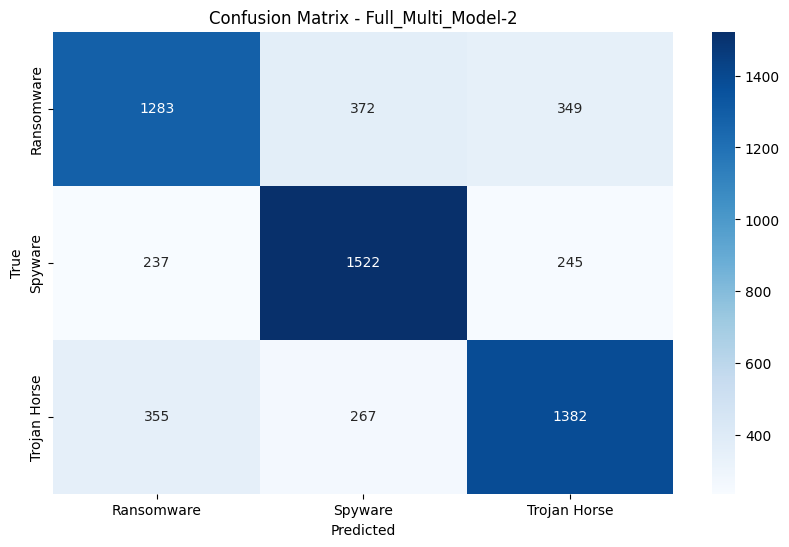

In [16]:
if __name__ == "__main__":
    df = pd.read_csv("Obfuscated-MalMem2022-multi-2.csv")

    run_experiment(df, use_pca=True, use_smote=True, use_attention=True, tag="Full_Multi_Model-2")